In [15]:
import math
import matplotlib.pyplot as plt
import numpy as np

### loop exit condition (cond) is changed

In [16]:
def mandelbrot(cond):
    resolution = 500

    rl = np.outer(np.linspace(-2, 2, resolution), np.ones((resolution,)))
    im = np.outer(1j*np.linspace(2, -2, resolution), np.ones((resolution,)))
    x =  rl.T + im

    y = np.zeros((np.shape(x)[0], np.shape(x)[1]))

    for row in range(np.shape(x)[0]):
        for col in range(np.shape(x)[1]):
            firstZ = x[row, col]
            for i in range(50):
                x[row, col] = x[row, col] ** 2 + firstZ
                if x[row, col].real * x[row, col].real + x[row, col].imag * x[row, col].imag > cond:
                    break

            y[col,row] = i
    return y

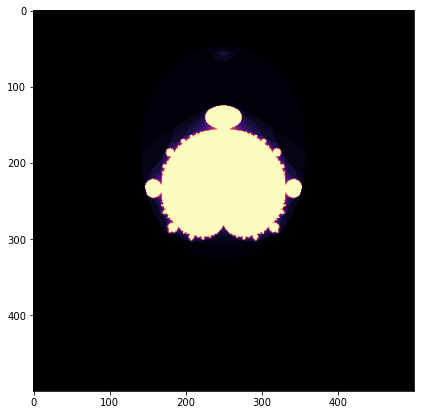

In [17]:
plt.subplots()[0].set_size_inches(7, 7)
plt.imshow(mandelbrot(1), cmap='magma')

### cython source of mandelbrot_c:
https://github.com/ksn38/cython_examples/blob/main/Mandelbrot_set/mandelbrot_c/mandelbrot_c.pyx

In [18]:
from mandelbrot_c import calc_mand

num = 0

for i in (np.linspace(0.001, 4, 1800)):   
    mb = calc_mand(i)

    fig, ax = plt.subplots()
    fig.set_size_inches(20, 20)
    fig.patch.set_visible(False)
    ax.axis('off')
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

    ax.imshow(mb, cmap='magma')

    plt.savefig('E:\\Temp\\tmp/{:04d}.png'.format(num))
    plt.clf()
    
    num += 1